In [13]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV ,cross_val_score
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score,f1_score,precision_recall_fscore_support
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#loading Processed data 

train_df=pd.read_csv('../data/processed/train.csv')
val_df=pd.read_csv('../data/processed/val.csv')
train_df.head()
val_df.head()

,property_address,categories
0,"aaraji no 4843 near bus stand , gram molela gp...",landparcel
1,"flat-c,floor-sixth shree niwas s no d no 880/4...",flat
2,unit-h-59 bapu nagar s no pur-road bhilwara 31...,others
3,"flat no. 404, 04th floor, wing b, cloud 28, 28...",flat
4,all that piece and parcel of the flat no. 302 ...,flat


In [5]:
X_train=train_df['property_address']
y_train=train_df['categories']
X_val=val_df['property_address']
y_val=val_df['categories']

In [7]:
#TF-IDF Vectorization for text to numeric vectors

vectorizer=TfidfVectorizer(max_features=500,ngram_range=(1,2),min_df=2,max_df=0.95,stop_words='english')

#fitting vectorizer 
X_train_tf=vectorizer.fit_transform(X_train)
X_val_tf=vectorizer.fit_transform(X_val)

print('Train shape: ',X_train_tf.shape)
print('val_df',X_val_tf.shape)

with open('../best_model/vectorizer.pkl','wb') as f:
    pickle.dump(vectorizer,f)

Train shape:  (6885, 500)
val_df (1722, 500)


In [9]:
#Loading label encoder 
with open('../best_model/label_encoder.pkl','rb') as f:
    le = pickle.load(f)

y_train_encoded=le.transform(y_train)
y_val_encoded=le.transform(y_val)

print('Classes :',le.classes_)

Classes : ['commercial unit' 'flat' 'houseorplot' 'landparcel' 'others']


In [11]:
#Trainig Models

print('LogisticRegression')
lr=LogisticRegression(random_state=42,max_iter=1000,n_jobs=-1)
lr.fit(X_train_tf,y_train_encoded)

lr_pred=lr.predict(X_val_tf)
lr_acc=accuracy_score(y_val_encoded,lr_pred)
lr_f1=f1_score(y_val_encoded,lr_pred,average='macro')

print('LR Accuracuy: ',lr_acc)
print('LR Macro F1: ',lr_f1)

#Random Forest
print('Random Forest ')
rf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,verbose=1)
rf.fit(X_train_tf,y_train_encoded)

rf_pred=rf.predict(X_val_tf)
rf_acc=accuracy_score(y_val_encoded,rf_pred)
rf_f1=f1_score(y_val_encoded,rf_pred,average='macro')

print('RF Accuracy: ',rf_acc)
print('RF Macro F1: ',rf_f1)

#SVM 
svm=SVC(kernel='linear',random_state=42,verbose=True)
svm.fit(X_train_tf,y_train_encoded)

svm_pred=svm.predict(X_val_tf)
svm_acc= accuracy_score(y_val_encoded,svm_pred)
svm_f1=f1_score(y_val_encoded,svm_pred,average='macro')

print('SVM Accuracy: ',svm_acc)
print('SVM Macro F1: ',svm_f1)

LogisticRegression
LR Accuracuy:  0.4326364692218351
LR Macro F1:  0.3258860235612556
Random Forest 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


RF Accuracy:  0.37746806039488967
RF Macro F1:  0.3063567816881293
[LibSVM]SVM Accuracy:  0.3879210220673635
SVM Macro F1:  0.3134789083898316


***Observation**
1) Low performance
2) HyperParameter can be performed  
3) Need better text preprocessing - Lower casing text\
4) improve TF-IDF - can increase maxfeatures to 15000-20000,trying bigram and trigram,Using ngram range(1,3)
5) Model Selection - Can Select LinearSVC , Or Logistic Regression

In [14]:
# #HyperparameterTuning 
# #Tunning Logistic Regreassion 

# lr_params={'C':[0.1,1,10],
#            'penalty':['12'],
#            'solver':['Ibfgs']}

# lr_grid=GridSearchCV(
#     LogisticRegression(max_iter=1000,n_jobs=1),
#     lr_params,
#     cv=3,
#     scoring='f1_macro',
#     n_jobs=-1)

# lr_grid.fit(X_train_tf,y_train_encoded)

# print("Best lr Params: ",lr_grid.best_params_)
# print('Best LR CV Score: ',lr_grid.best_score_)

# best_lr=lr_grid.best_estimator_

# lr_val_pred=best_lr.predict(X_val_tf)
# print('Validation F1 :',f1_score(y_val_encoded,lr_val_pred,average='macro'))
# print('Validation Accuracy : ',accuracy_score(y_val_encoded,lr_val_pred))


# #Tunning Random Forest 

# rf_params={
#     "n_estimators":[100,200],
#     'max_depth':[None,20],
#     'max_features':['sqrt','log2']
# }

# rf_grid=GridSearchCV(
#     RandomForestClassifier(random_state=42,n_jobs=-1),
#     rf_params,
#     cv=3,
#     scoring='f1_score',
#     n_jobs=-1
# )
# rf_grid.fit(X_train_tf,y_train_encoded)

# print("Best RF params: ",rf_grid.best_params_)
# print("Best Rf CV Score:",rf_grid.best_score_)

# best_rf=rf_grid.best_estimator_

# rf_val_pred=best_rf.predict(X_val_tf)
# print("Validation F1: ",f1_score(y_val_encoded,rf_val_pred,average='macro'))
# print("Validation Accujracy: ",accuracy_score(y_val_encoded,rf_val_pred))

Classification Report (Base Logistic Regression)
                 precision    recall  f1-score   support

commercial unit       0.05      0.02      0.02       191
           flat       0.55      0.63      0.59       622
    houseorplot       0.42      0.48      0.45       499
     landparcel       0.36      0.25      0.29       171
         others       0.26      0.30      0.28       239

       accuracy                           0.43      1722
      macro avg       0.33      0.33      0.33      1722
   weighted avg       0.40      0.43      0.41      1722

Per-Class Performance 
             Class  Precision    Recall        F1  Support
0  commercial unit   0.048387  0.015707  0.023715      191
1             flat   0.551481  0.628617  0.587528      622
2      houseorplot   0.423488  0.476954  0.448633      499
3       landparcel   0.358974  0.245614  0.291667      171
4           others   0.261029  0.297071  0.277886      239


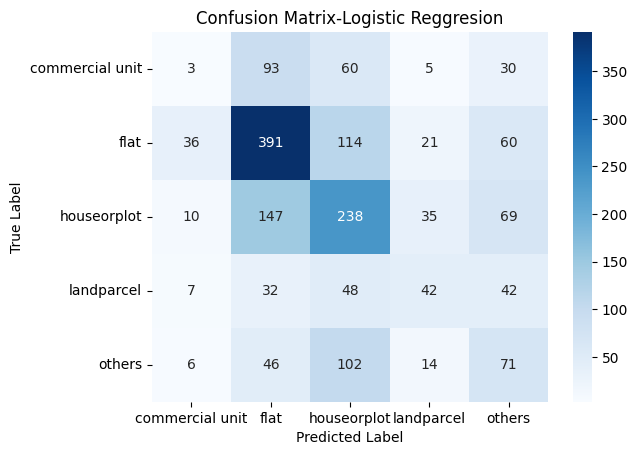

In [16]:
#Evaluation

#Prediction using baseline modeln LogisticRegression
final_pred=lr.predict(X_val_tf)

#Convert encoded models back to original categorical names 
final_pred_labels=le.inverse_transform(final_pred)

#Classification Report 
print("Classification Report (Base Logistic Regression)")
print(classification_report(y_val,final_pred_labels))

#Confusion matrix for comparing predicted value with true value 
cm=confusion_matrix(y_val,final_pred_labels)

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix-Logistic Reggresion")
plt.ylabel('True Label')
plt.xlabel("Predicted Label")

#Per Class Metrics

precision,recall,f1,support=precision_recall_fscore_support(y_val,final_pred_labels,average=None,labels=le.classes_)

per_class_df= pd.DataFrame({
    'Class':le.classes_,
    'Precision':precision,
    'Recall':recall,
    'F1':f1,
    'Support':support
})

print("Per-Class Performance ")
print(per_class_df)

In [17]:
#Saving the best model(Logistic Regression

with open('../best_model/traditional_model.pkl','wb') as f:
    pickle.dump(lr,f)

print('Current best modelk saved')
print("final Accuracy :",accuracy_score(y_val,final_pred_labels))
print('Final Macro F1 :',f1_score(y_val,final_pred_labels,average='macro'))


Current best modelk saved
final Accuracy : 0.4326364692218351
Final Macro F1 : 0.3258860235612556


In [19]:
#Test
sample_addressess=[
    "Flat No 101, Tower A, Building 5, Mumbai",
    "Plot No 45, Sector 12, Residential Area, Delhi",
    "Shop No 23, Ground Floor, Commercial Complex, Bangalore"
]
sample_tfidf=vectorizer.transform(sample_addressess)
sample_pred=lr.predict(sample_tfidf)
sample_labels=le.inverse_transform(sample_pred)

for addr,pred in zip(sample_addressess,sample_labels):
    print(addr[:50],"..->",pred)

Flat No 101, Tower A, Building 5, Mumbai ..-> flat
Plot No 45, Sector 12, Residential Area, Delhi ..-> flat
Shop No 23, Ground Floor, Commercial Complex, Bang ..-> houseorplot
